In [1]:
#Load the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#Check for info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#Check for the null values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
#Check for the statistical five point summary
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


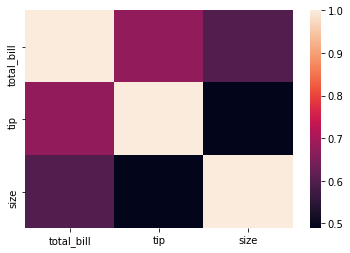

In [7]:
sns.heatmap(df.corr()) #Check for the correlation

In [8]:
df['total_bill'] #Select the target variable

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [9]:
#do the univariate and bivariate


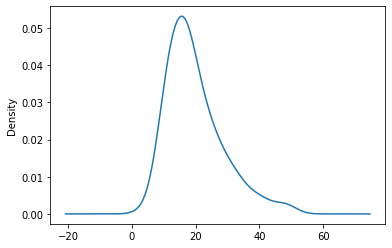

In [10]:
df['total_bill'].plot(kind='kde')

In [11]:
#The curve looks lepto curtic
#There are outliers
#The mean is 19.785943 and median is 17.795000
#The data is right skewed

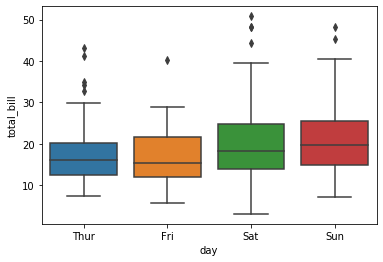

In [12]:
#bivariate analysis
sns.boxplot(x='day', y='total_bill', data=df)

In [13]:
#There are many outliers on thursday
#the tips are maximum during saturday

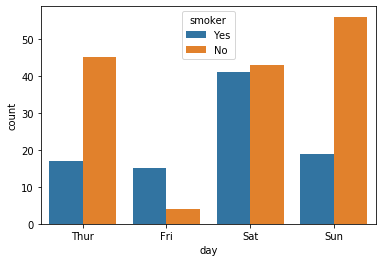

In [26]:
sns.countplot(x='day', data=df1, hue='smoker')

In [14]:
#Outlier treatment is a must for total bill column as it has outliers

In [15]:
#by using zscore 

In [16]:
from scipy.stats import zscore

In [21]:
df['zscore'] = zscore(df['total_bill'])
df.shape

(244, 8)

In [22]:
df1 = df[(df['zscore'] > -3) & (df['zscore'] < 3)]
df1.shape

(240, 8)

In [23]:
#by using IQR
q1 = df['total_bill'].quantile(0.25)
q2 = df['total_bill'].quantile(0.5)
q3 = df['total_bill'].quantile(0.75)

iqr = q3-q1
upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)
df2 = df[(df['total_bill']>lower) & (df['total_bill']<upper)]

In [25]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(244, 8)
(240, 8)
(235, 8)
